In [ ]:
'''
dataset of customer information for an online clothing store,
including age, gender, income, and purchase history. 
We want to group these customers into different clusters
based on their purchasing behavior.
'''

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
# Generate false data with deliberate errors
data = pd.DataFrame({
    'Age': np.random.choice([25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 100),
    'Income': np.random.choice([25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000], 100),
    'SpendingScore': np.random.choice([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 100)
})

# Introduce deliberate errors to practice some data cleaning 
data.loc[10:20, 'Age'] = -1  # Invalid negative age values
data.loc[30:40, 'Income'] = 'unknown'  # Invalid string values for income
data.loc[50:60, 'SpendingScore'] = np.nan  # Missing values for spending score

# Save the dataset as a CSV file
data.to_csv('customer_data.csv', index=False)

In [4]:
# clean and preprocess data
# Handling Missing Data (nan) 
# easy way is to drop the number or fill it with 0 or...
def handle_missing_values(data, strategy='drop', fill_value=0,delete_unknown=True, delete_negative_one=True):
    if strategy == 'drop':
        # Drop rows with any missing values
        data_cleaned = data.dropna()
    elif strategy == 'fill':
        # Fill missing values with the specified fill_value
        if fill_value is None:
            raise ValueError("fill_value must be provided when strategy is 'fill'")
        # Fill missing values with the specified fill_value
        data_cleaned = data.fillna(fill_value)
    elif strategy == 'mean':
        # Fill missing values with the mean of each column
        data_cleaned = data.fillna(data.mean())
    else:
        raise ValueError("Invalid strategy. Options: 'drop', 'fill'")
    # Delete rows with unknown values    
    if delete_unknown:
        data_cleaned = data_cleaned[~data_cleaned.isin(['unknown', 'Unknown', 'UNKNOWN'])]

    # Delete rows with -1 values
    if delete_negative_one:
        data_cleaned = data_cleaned[data_cleaned != -1].dropna()

    return data_cleaned


# we can Create a linear regression model to predict missing values using KNN and using scikit library 

# Removing Duplicates: Duplicated data can be identified and removed to ensure data integrity. 
def remove_duplicates(data, columns=None, keep='first'):
    # Remove duplicates based on specified columns
    data_cleaned = data.drop_duplicates(subset=columns, keep=keep)

    return data_cleaned

In [4]:
data = pd.read_csv('customer_data.csv')
# we'll extract the relevant features from the dataset and
# normalize them to have a mean of 0 and a standard deviation of 1:
X = data[['Age', 'Income', 'SpendingScore']].values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [5]:
#Then, we'll use the k-means algorithm to cluster 
#the data into a specified number of clusters (in this case, 
#let's say 5):
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)


KMeans(n_clusters=5)

In [6]:
#We can then get the cluster assignments for each data point:
labels = kmeans.labels_

#We can also get the coordinates of the cluster centers:
centroids = kmeans.cluster_centers_


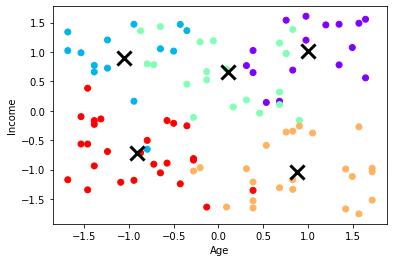

In [7]:
#visualize the clusters using a scatter plot:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()
